In [1]:
import pandas as pd

# Carica il dataset
df = pd.read_csv('C:\\Users\\CRAIA-AREA EDUCATORI\\Documents\\Università\\Sistemi intelligenti per internet\\beer_data\\beer_reviews.csv')

# Visualizza le prime righe del DataFrame
print(df.head())


   brewery_id             brewery_name  review_time  review_overall  \
0       10325          Vecchio Birraio   1234817823             1.5   
1       10325          Vecchio Birraio   1235915097             3.0   
2       10325          Vecchio Birraio   1235916604             3.0   
3       10325          Vecchio Birraio   1234725145             3.0   
4        1075  Caldera Brewing Company   1293735206             4.0   

   review_aroma  review_appearance review_profilename  \
0           2.0                2.5            stcules   
1           2.5                3.0            stcules   
2           2.5                3.0            stcules   
3           3.0                3.5            stcules   
4           4.5                4.0     johnmichaelsen   

                       beer_style  review_palate  review_taste  \
0                      Hefeweizen            1.5           1.5   
1              English Strong Ale            3.0           3.0   
2          Foreign / Export Stou

In [2]:
import random
import networkx as nx

# Imposta un numero massimo di birre da includere nel grafo (ad esempio, 500 birre)
sampled_beers = random.sample(df['beer_beerid'].unique().tolist(), 500)

# Filtra il dataset per includere solo queste birre
sampled_df = df[df['beer_beerid'].isin(sampled_beers)]

# Costruisci il grafo come prima, ma solo con il campione
beer_graph = nx.Graph()

for user, group in sampled_df.groupby('review_profilename'):
    beer_ids = group['beer_beerid'].tolist()
    for i in range(len(beer_ids)):
        for j in range(i + 1, len(beer_ids)):
            beer_graph.add_edge(beer_ids[i], beer_ids[j])

# Verifica il numero di nodi e archi
print("Numero di nodi:", beer_graph.number_of_nodes())
print("Numero di archi:", beer_graph.number_of_edges())


Numero di nodi: 486
Numero di archi: 10135


In [3]:
# Calcola il PageRank
pagerank_scores = nx.pagerank(beer_graph)

# Ordina le birre per PageRank in ordine decrescente
top_beers = sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True)[:10]

# Visualizza le 10 birre più influenti
print("Top 10 Birre più influenti:")
for beer_id, score in top_beers:
    beer_name = df[df['beer_beerid'] == beer_id]['beer_name'].iloc[0]
    print(f"Birra: {beer_name} (ID: {beer_id}) - PageRank: {score}")


Top 10 Birre più influenti:
Birra: Gonzo Imperial Porter (ID: 24071) - PageRank: 0.02119414369166753
Birra: Samuel Smith's, The Famous Taddy Porter (ID: 572) - PageRank: 0.01865747641383516
Birra: Fraoch Heather Ale (ID: 245) - PageRank: 0.0166005621879063
Birra: In-Heat Wheat (ID: 2249) - PageRank: 0.01456425190952384
Birra: Old #38 Stout (ID: 408) - PageRank: 0.014103556375149396
Birra: Longboard Island Lager (ID: 5328) - PageRank: 0.012564790392557973
Birra: Heavy Seas - Winter Storm ("Category 5" Ale) (ID: 15989) - PageRank: 0.011571258580724152
Birra: Jinx (ID: 296) - PageRank: 0.011554394284821492
Birra: Coffeehouse Porter (ID: 85) - PageRank: 0.01140307783828714
Birra: Bell's Rye Stout (ID: 2009) - PageRank: 0.010996642885782162


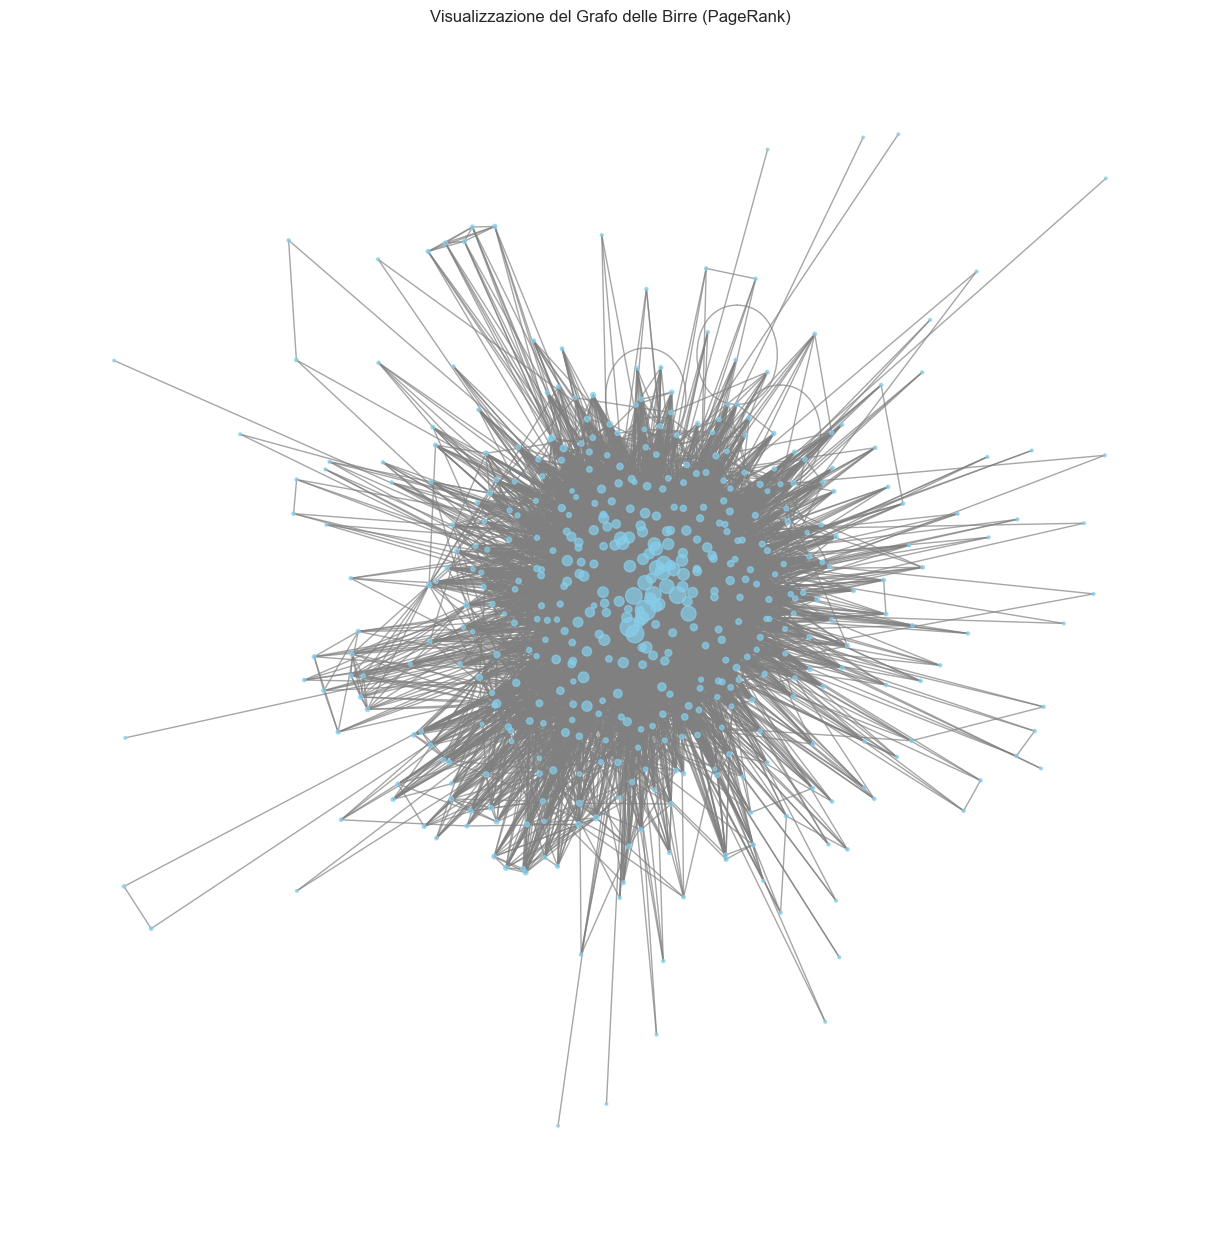

In [4]:
import matplotlib.pyplot as plt

# Dimensiona i nodi in base al loro PageRank per evidenziare le birre più influenti
node_sizes = [pagerank_scores[node] * 10000 for node in beer_graph.nodes()]

plt.figure(figsize=(12, 12))
nx.draw(beer_graph, node_size=node_sizes, with_labels=False, node_color="skyblue", edge_color="gray", alpha=0.7)
plt.title("Visualizzazione del Grafo delle Birre (PageRank)")
plt.show()


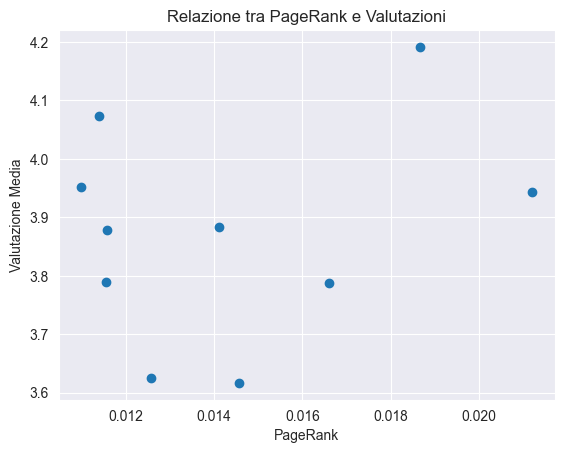

In [5]:
# Aggiungi il PageRank al DataFrame filtrato
df_pr = pd.DataFrame(top_beers, columns=['beer_beerid', 'pagerank_score'])
merged_df = df.merge(df_pr, left_on='beer_beerid', right_on='beer_beerid', how='inner')

# Calcola la media della valutazione per ogni birra
avg_ratings = merged_df.groupby('beer_beerid')['review_overall'].mean().reset_index()
avg_ratings = avg_ratings.merge(df_pr, on='beer_beerid')

# Visualizza il rapporto
plt.scatter(avg_ratings['pagerank_score'], avg_ratings['review_overall'])
plt.xlabel("PageRank")
plt.ylabel("Valutazione Media")
plt.title("Relazione tra PageRank e Valutazioni")
plt.show()


In [6]:
import numpy as np

# Calcola la correlazione di Pearson tra PageRank e valutazione media
correlation = np.corrcoef(avg_ratings['pagerank_score'], avg_ratings['review_overall'])[0, 1]
print("Correlazione tra PageRank e Valutazione Media: {correlation}")


Correlazione tra PageRank e Valutazione Media: {correlation}


In [7]:
from networkx.algorithms.community import greedy_modularity_communities

# Trova le comunità nel grafo usando l'algoritmo di modularità
communities = list(greedy_modularity_communities(beer_graph))

# Mostra le dimensioni delle comunità principali
print(f"Numero di comunità trovate: {len(communities)}")
for i, community in enumerate(communities[:5]):  # mostra le prime 5 comunità
    print(f"Comunità {i + 1}: {len(community)} birre")


Numero di comunità trovate: 4
Comunità 1: 171 birre
Comunità 2: 158 birre
Comunità 3: 154 birre
Comunità 4: 3 birre


In [8]:
# Analizza le birre per comunità
for i, community in enumerate(communities):
    community_beers = list(community)
    community_df = df[df['beer_beerid'].isin(community_beers)]
    
    # Mostra la distribuzione degli stili di birra
    style_counts = community_df['beer_style'].value_counts()
    print(f"\nComunità {i + 1} - Stili di birra più comuni:")
    print(style_counts.head(5))
    
    # Mostra la birreria più rappresentata
    brewery_counts = community_df['brewery_name'].value_counts()
    print(f"\nComunità {i + 1} - Birrerie più rappresentate:")
    print(brewery_counts.head(5))



Comunità 1 - Stili di birra più comuni:
beer_style
English Porter                    1205
American Double / Imperial IPA     408
American Porter                    369
American IPA                       283
American Pale Ale (APA)            274
Name: count, dtype: int64

Comunità 1 - Birrerie più rappresentate:
brewery_name
Samuel Smith Old Brewery (Tadcaster)    1152
Anheuser-Busch                           268
New Glarus Brewing Company               258
Harpoon Brewery                          245
JOS. Schlitz Brewing Co. (Pabst)         192
Name: count, dtype: int64

Comunità 2 - Stili di birra più comuni:
beer_style
Baltic Porter                          1370
Scottish Gruit / Ancient Herbed Ale     674
Scotch Ale / Wee Heavy                  368
Hefeweizen                              177
American Porter                          92
Name: count, dtype: int64

Comunità 2 - Birrerie più rappresentate:
brewery_name
Flying Dog Brewery                    1366
Williams Brothers Brewing

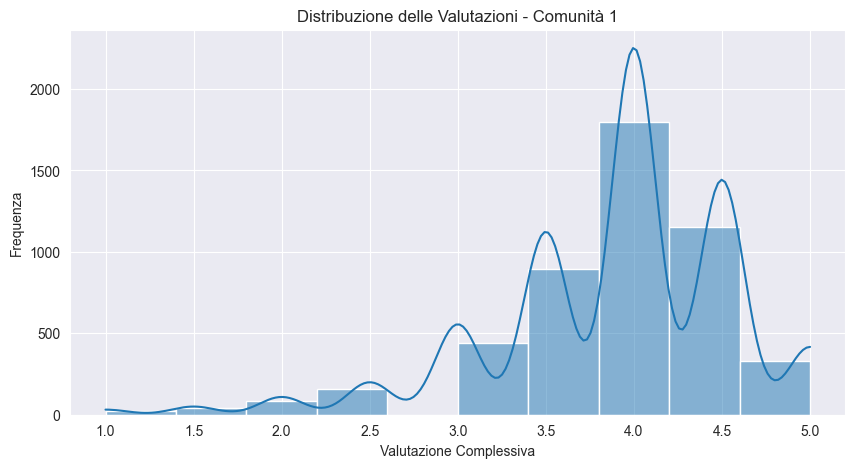

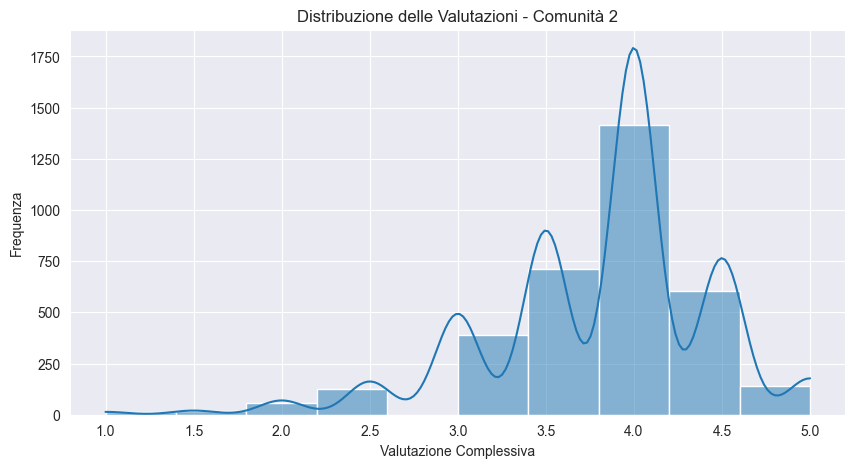

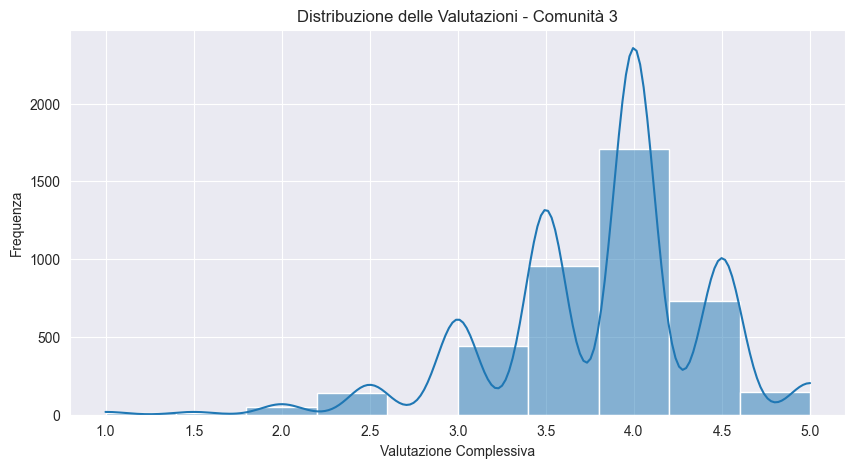

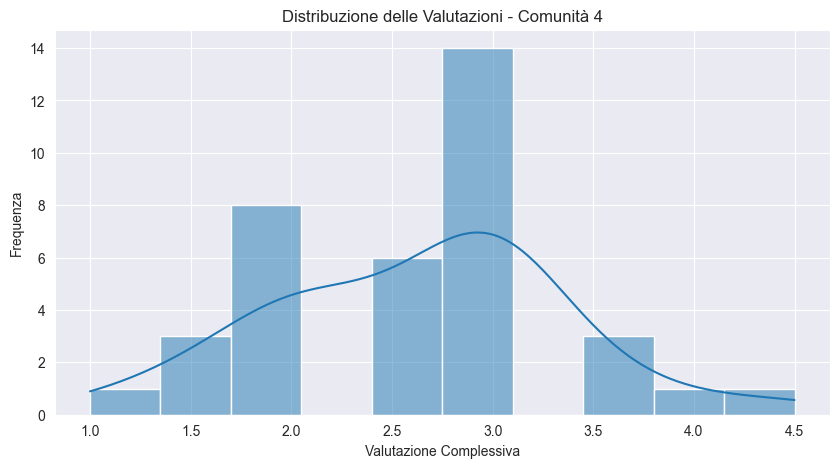

In [9]:
import seaborn as sns

for i, community in enumerate(communities):
    community_beers = list(community)
    community_df = df[df['beer_beerid'].isin(community_beers)]
    
    plt.figure(figsize=(10, 5))
    sns.histplot(community_df['review_overall'], bins=10, kde=True)
    plt.title(f"Distribuzione delle Valutazioni - Comunità {i + 1}")
    plt.xlabel("Valutazione Complessiva")
    plt.ylabel("Frequenza")
    plt.show()


In [10]:
for i, community in enumerate(communities):
    community_beers = list(community)
    community_pagerank = {beer: pagerank_scores[beer] for beer in community_beers}
    top_community_beers = sorted(community_pagerank.items(), key=lambda x: x[1], reverse=True)[:5]
    
    print(f"\nComunità {i + 1} - Top 5 birre per PageRank:")
    for beer_id, score in top_community_beers:
        beer_name = df[df['beer_beerid'] == beer_id]['beer_name'].iloc[0]
        print(f"Birra: {beer_name} (ID: {beer_id}) - PageRank: {score}")



Comunità 1 - Top 5 birre per PageRank:
Birra: Samuel Smith's, The Famous Taddy Porter (ID: 572) - PageRank: 0.01865747641383516
Birra: Apex (ID: 22172) - PageRank: 0.008689090874372142
Birra: Michelob Hop Hound Amber Wheat (ID: 47290) - PageRank: 0.008174461418772773
Birra: The Angel's Share Grand Cru (ID: 56129) - PageRank: 0.007996043999263956
Birra: Bière De Mars - Grand Reserve (ID: 31242) - PageRank: 0.007790947719054854

Comunità 2 - Top 5 birre per PageRank:
Birra: Gonzo Imperial Porter (ID: 24071) - PageRank: 0.02119414369166753
Birra: Fraoch Heather Ale (ID: 245) - PageRank: 0.0166005621879063
Birra: Jinx (ID: 296) - PageRank: 0.011554394284821492
Birra: Hirsch Bavarian-Weissbier Hefeweisse (ID: 8784) - PageRank: 0.00657780517250934
Birra: Quintine Blonde (ID: 5069) - PageRank: 0.006059775212228262

Comunità 3 - Top 5 birre per PageRank:
Birra: In-Heat Wheat (ID: 2249) - PageRank: 0.01456425190952384
Birra: Old #38 Stout (ID: 408) - PageRank: 0.014103556375149396
Birra: Longb

In [11]:
import networkx as nx

# Caricamento dataset
df = pd.read_csv('C:\\Users\\CRAIA-AREA EDUCATORI\\Documents\\Università\\Sistemi intelligenti per internet\\beer_data\\beer_reviews.csv')

# Creazione del grafo degli stili di birra
style_graph = nx.Graph()

# Raggruppiamo le birre per stile e troviamo la media delle valutazioni per ogni stile
style_groups = df.groupby('beer_style')
style_mean_ratings = style_groups['review_overall'].mean()

# Iteriamo sugli stili per creare collegamenti in base alla somiglianza delle valutazioni
for style1, rating1 in style_mean_ratings.items():
    for style2, rating2 in style_mean_ratings.items():
        if style1 != style2 and abs(rating1 - rating2) < 0.5:  # Soglia di somiglianza nelle valutazioni
            style_graph.add_edge(style1, style2)

# Calcolo del PageRank per gli stili di birra
style_pagerank = nx.pagerank(style_graph)

# Creazione di un DataFrame per mostrare i risultati
style_pagerank_df = pd.DataFrame({
    'Style': list(style_pagerank.keys()),
    'PageRank': list(style_pagerank.values()),
    'Mean Rating': [style_mean_ratings[style] for style in style_pagerank.keys()]
})

# Ordinamento per PageRank
style_pagerank_df = style_pagerank_df.sort_values(by='PageRank', ascending=False)
print("Top Stili di Birra per PageRank:")
print(style_pagerank_df.head(10))


Top Stili di Birra per PageRank:
                                  Style  PageRank  Mean Rating
51                                 Faro  0.010916     3.600164
32                            Cream Ale  0.010916     3.602277
5                   American Blonde Ale  0.010823     3.591741
76                          Pumpkin Ale  0.010668     3.619646
2            American Amber / Red Lager  0.010636     3.564601
26      Bière de Champagne / Bière Brut  0.010429     3.648184
87  Scottish Gruit / Ancient Herbed Ale  0.010429     3.686841
29                                 Bock  0.010429     3.647814
82                                Sahti  0.010429     3.700283
14              American Pale Wheat Ale  0.010429     3.646918


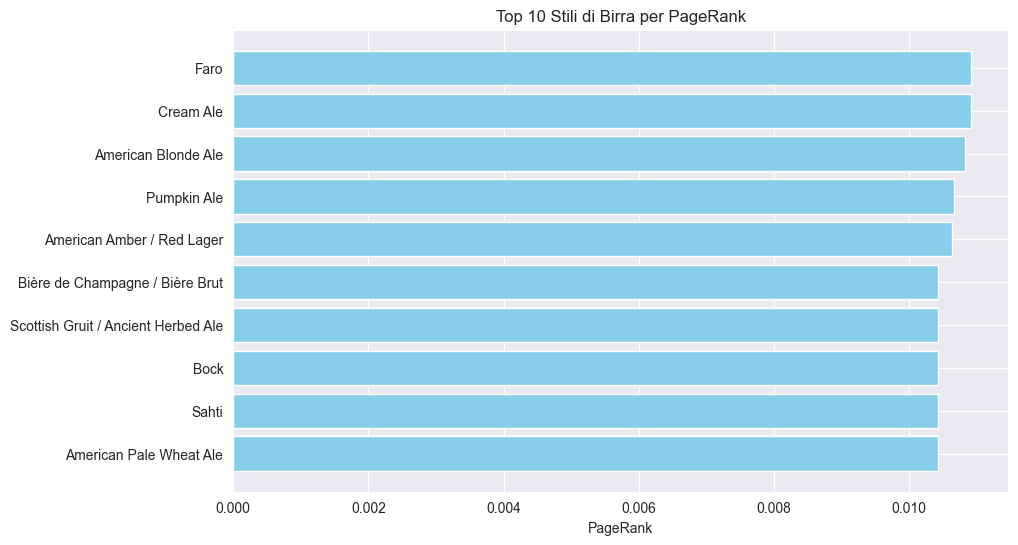

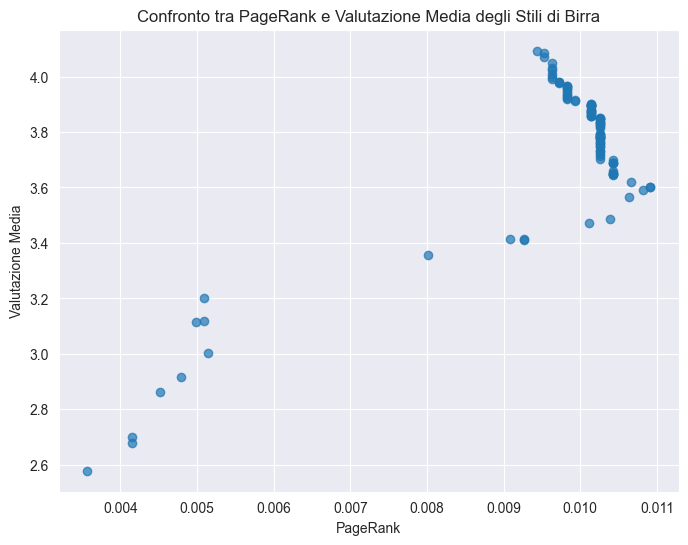

In [12]:
# Top 10 stili per PageRank
top_styles = style_pagerank_df.head(10)

# Grafico a barre per il PageRank dei primi 10 stili di birra
plt.figure(figsize=(10, 6))
plt.barh(top_styles['Style'], top_styles['PageRank'], color='skyblue')
plt.xlabel('PageRank')
plt.title('Top 10 Stili di Birra per PageRank')
plt.gca().invert_yaxis()  # Inverti l'asse per avere il più alto in cima
plt.show()

# Grafico a dispersione per PageRank vs. Valutazione Media
plt.figure(figsize=(8, 6))
plt.scatter(style_pagerank_df['PageRank'], style_pagerank_df['Mean Rating'], alpha=0.7)
plt.xlabel('PageRank')
plt.ylabel('Valutazione Media')
plt.title('Confronto tra PageRank e Valutazione Media degli Stili di Birra')
plt.show()


In [13]:
# Supponiamo di avere due DataFrame: uno con i PageRank per ciascun stile di birra e uno con le valutazioni medie
# Uniamoli in beer_style_pagerank_df

# Esempio di creazione di un DataFrame fittizio per PageRank e valutazioni medie (da sostituire con i tuoi dati)
pagerank_data = {'beer_style': ['Faro', 'Cream Ale', 'American Blonde Ale', 'Pumpkin Ale'], 'PageRank': [0.010, 0.009, 0.008, 0.007]}
average_rating_data = {'beer_style': ['Faro', 'Cream Ale', 'American Blonde Ale', 'Pumpkin Ale'], 'average_rating': [3.2, 4.0, 3.5, 3.8]}

pagerank_df = pd.DataFrame(pagerank_data)
rating_df = pd.DataFrame(average_rating_data)

# Unione dei DataFrame basata su beer_style
beer_style_pagerank_df = pd.merge(pagerank_df, rating_df, on='beer_style')



# Filtrare gli stili con PageRank sopra la mediana e valutazione media sotto la mediana
median_pagerank = beer_style_pagerank_df['PageRank'].median()
median_rating = beer_style_pagerank_df['average_rating'].median()

high_pagerank_low_rating = beer_style_pagerank_df[
    (beer_style_pagerank_df['PageRank'] > median_pagerank) &
    (beer_style_pagerank_df['average_rating'] < median_rating)
]

# Esplorare le caratteristiche di questi stili
high_pagerank_low_rating_stats = df[df['beer_style'].isin(high_pagerank_low_rating['beer_style'])].groupby('beer_style').agg({
    'beer_abv': 'mean',
    'brewery_name': 'nunique',
    'review_overall': ['mean', 'count']
}).reset_index()

high_pagerank_low_rating_stats.columns = ['beer_style', 'avg_abv', 'unique_breweries', 'avg_rating', 'num_reviews']
high_pagerank_low_rating_stats


,beer_style,avg_abv,unique_breweries,avg_rating,num_reviews
0,Faro,4.677176,13,3.600164,609


In [14]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Creare il profilo di preferenze di ogni utente basato sullo stile della birra
user_profiles = df.groupby(['review_profilename', 'beer_style'])['review_overall'].mean().unstack(fill_value=0)

# Standardizzare i dati per il clustering
scaler = StandardScaler()
user_profiles_scaled = scaler.fit_transform(user_profiles)

# Applicare K-means clustering
kmeans = KMeans(n_clusters=6, random_state=42)  # Usa il numero di cluster che preferisci
user_clusters = kmeans.fit_predict(user_profiles_scaled)

# Aggiungere i cluster al profilo utente
user_profiles['cluster'] = user_clusters

# Analizzare le preferenze di ogni cluster
cluster_preferences = user_profiles.groupby('cluster').mean()
cluster_preferences.T


cluster,0,1,2,3,4,5
beer_style,,,,,,
Altbier,0.051552,3.679459,1.471409,1.068892,2.988784,0.319983
American Adjunct Lager,0.298446,2.836607,2.443888,1.021741,2.594121,0.819971
American Amber / Red Ale,0.303267,3.751444,3.309482,3.452094,3.754112,1.905312
American Amber / Red Lager,0.105844,3.389838,2.142126,0.871257,2.874350,0.497207
American Barleywine,0.123401,3.862250,1.937502,3.307561,3.585522,1.140242
...,...,...,...,...,...,...
Vienna Lager,0.078980,3.636326,2.621831,0.993806,3.250397,0.521573
Weizenbock,0.059039,3.924540,1.502241,2.083630,3.510926,0.471525
Wheatwine,0.015332,3.343538,0.196421,1.308472,1.815693,0.157553
